## Implementing ResNet

In this lab, we will continue exploring Model subclassing by building a more complex architecture. 

[Residual Networks](https://arxiv.org/abs/1512.03385) make use of skip connections to make deep models easier to train. 
- There are branches as well as many repeating blocks of layers in this type of network. 
- You can define a model class to help organize this more complex code, and to make it easier to re-use your code when building the model.
- As before, you will inherit from the [Model class](https://keras.io/api/models/model/) so that you can make use of the other built-in methods that Keras provides.

## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Layer

## Implement Model subclasses

we will first implement the Identity Block which contains the skip connections (i.e. the `add()` operation below. This will also inherit the Model class and implement the `__init__()` and `call()` methods.

In [2]:
# This block is a typical ResNet block with some convolution and batch normalization layers in it
class IdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size):
        '''
        It initiates an identity block model.

        Parameters:
        - filters: number of convolutions for each layer
        - kernel_size: Size of kernels 
        '''
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()

        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()

        self.act = tf.keras.layers.Activation('relu')
        self.add = tf.keras.layers.Add()

    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = self.act(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.add([input_tensor, x])
        x = self.act(x)
        return x

From here, we can build the rest of the ResNet model. 
- You will call your `IdentityBlock` class two times below and that takes care of inserting those blocks of layers into this network.

In [4]:
# Now let's visulize our IdentityBlock model

# Create an instance of the IdentityBlock
block = IdentityBlock(filters=64, kernel_size=3)  # Using example parameters

# Build the block by providing an input shape
block.build((None, 32, 32, 64))  # Assuming an input shape of (32, 32, 64) for this example

# Print the block summary
block.summary()

Model: "identity_block"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  36928     
                                                                 
 batch_normalization (Batch  multiple                  256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           multiple                  36928     
                                                                 
 batch_normalization_1 (Bat  multiple                  256       
 chNormalization)                                                
                                                                 
 activation (Activation)     multiple                  0         
                                                                 
 add (Add)                   multiple               

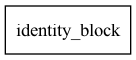

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(block, )